# Drug consumption (quantified) Data Set

Abstract: Classify the type of drug consumer by personality data

Number of Instances: 1885

Number of Attributes: 32

Date Donated: 2016-10-17

Original database: http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Predict if a person is a drug consumer based on their personality data and demographics

In [106]:
# Required libraries
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from pylab import *

# ML
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import export_graphviz
import graphviz

In [49]:
# Read data from csv saved in your computer
df = pd.read_csv("C:/Users/kqtt651/OneDrive - AZCollaboration/dataFrames/drugConsumption.csv", delimiter=';')
df.head() # visualize the first rows of tha DataFrame

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy.2,Heroin.2,Ketamine.2,Legalh.2,LSD.2,Meth.2,Mushrooms.2,Nicotine.2,Semer.2,VSA.2
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,"0,31287","-0,57545","-0,58331","-0,91699",...,NU,NU,NU,NU,NU,NU,NU,U,NU,NU
1,2,25-34,Male,Doctorate degree,UK,White,"-0,67825","1,93886","1,43533","0,76096",...,U,NU,U,NU,U,U,NU,U,NU,NU
2,3,35-44,Male,Professional certificate/ diploma,UK,White,"-0,46725","0,80523","-0,84732","-1,6209",...,NU,NU,NU,NU,NU,NU,U,NU,NU,NU
3,4,18-24,Female,Masters degree,UK,White,"-0,14882","-0,80615","-0,01928","0,59042",...,NU,NU,U,NU,NU,NU,NU,U,NU,NU
4,5,35-44,Female,Doctorate degree,UK,White,"0,73545","-1,6334","-0,45174","-0,30172",...,U,NU,NU,U,NU,NU,U,U,NU,NU


The original DataFrame has commas instead of dots at decimal places. We need to replace those commas with dots to then convert the Pandas DataFrame to a NumPy array.

We will also scale and normalize our data, i.e. we will change it to have zero mean and standard deviation equal to one.

Once we have changed this we will split the data set in training and testing set.

In [101]:
X = df[['Nscore','Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].apply(lambda x: x.str.replace(',','.'))
X = stats.zscore(np.array(X, dtype = np.float))

Y_names = ['Coke.1', 'Crack.1','Ecstasy.1', 'Heroin.1']
Y_names
Y = df[['Coke.1', 'Crack.1','Ecstasy.1', 'Heroin.1', ]].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state=10)

### PCA

[[ 0.3221328  -0.07170255  0.28219393 -0.32168185 -0.42933754  0.52467751
   0.49835666]
 [-0.43978976  0.60986829  0.39824829  0.20263827  0.2981108   0.19516289
   0.32866864]
 [-0.32885591  0.18606233 -0.4793885  -0.76595018  0.16722587  0.09651726
   0.05883454]
 [ 0.24962991 -0.09251792  0.61616283 -0.48178447  0.40400492 -0.38385874
  -0.08237064]
 [ 0.55428175  0.03050625 -0.31464138  0.16354062  0.66406363  0.30229059
   0.18367438]
 [ 0.46619577  0.75869583 -0.07176796 -0.07560039 -0.29128978 -0.14176391
  -0.30204195]
 [ 0.088246    0.056486   -0.21941987  0.06481979 -0.09891674 -0.64690435
   0.71302562]]
[0.32090788 0.26036508 0.12607872 0.09591916 0.0797303  0.06766605
 0.04933281]
1.0000000000000002


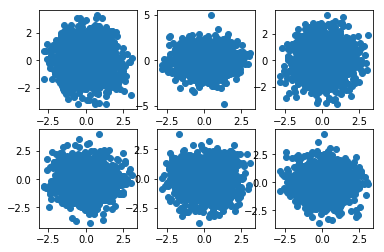

In [92]:
pca = PCA(n_components = 7, whiten = True).fit(X)
X_pca = pca.transform(X)
print(pca.components_)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

plt.subplot(2,3,1)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.subplot(2,3,2)
plt.scatter(X_pca[:, 0], X_pca[:, 2])
plt.subplot(2,3,3)
plt.scatter(X_pca[:, 0], X_pca[:, 3])
plt.subplot(2,3,4)
plt.scatter(X_pca[:, 0], X_pca[:, 4])
plt.subplot(2,3,5)
plt.scatter(X_pca[:, 0], X_pca[:, 5])
plt.subplot(2,3,6)
plt.scatter(X_pca[:, 0], X_pca[:, 6])


### KMeans

Text(0.5,0,'Ascore')

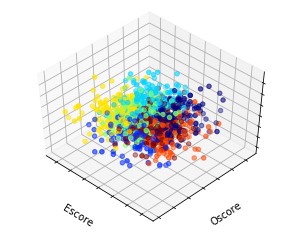

In [65]:
model_KMeans = KMeans(n_clusters = 7)

fig = plt.figure(figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
model_KMeans.fit(X_train)
labels = model_KMeans.labels_

ax.scatter(X_train[:,1], X_train[:,2], X_train[:,3], c=labels.astype(np.float), cmap='jet')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Escore')
ax.set_ylabel('Oscore')
ax.set_zlabel('Ascore')

#plt.scatter(X_train[:,0],X_train[:,1], c=labels.astype(np.float))

### Decission Tree

In [143]:
model_Tree = tree.DecisionTreeClassifier()
model_Tree_fit = model_Tree.fit(X_train, Y_train)
#tree.plot_tree(model_Tree_fit)
prediction_Tree = model_Tree_fit.predict(X_test)

# Print prediction accuracy
accuracy_Tree = sum((np.equal(prediction_Tree, Y_test)), axis= 0)/Y_test.shape[0]
print("Percentage correctly classified:",round(accuracy_Tree[0]*100,2), "%")
print("Percentage correctly classified:",round(accuracy_Tree[1]*100,2), "%")
print("Percentage correctly classified:",round(accuracy_Tree[2]*100,2), "%")
print("Percentage correctly classified:",round(accuracy_Tree[3]*100,2), "%")


Percentage correctly classified: 55.32 %
Percentage correctly classified: 75.32 %
Percentage correctly classified: 60.97 %
Percentage correctly classified: 74.03 %


In [141]:
model_GNB = GaussianNB()
model_GNB_fit = model_GNB.fit(X_train, Y_train[:,0])
prediction_GNB = model_GNB_fit.predict(X_test)

# Print prediction accuracy
accuracy_GNB = sum((np.equal(prediction_GNB, Y_test[:,0])), axis= 0)/Y_test.shape[0]

print("Percentage correctly classified:",round(accuracy_GNB*100,2), "%")

model_GNB_fit = model_GNB.fit(X_train, Y_train[:,1])
prediction_GNB = model_GNB_fit.predict(X_test)
accuracy_GNB = sum((np.equal(prediction_GNB, Y_test[:,1])), axis= 0)/Y_test.shape[0]

print("Percentage correctly classified:",round(accuracy_GNB*100,2), "%")

model_GNB_fit = model_GNB.fit(X_train, Y_train[:,2])
prediction_GNB = model_GNB_fit.predict(X_test)
accuracy_GNB = sum((np.equal(prediction_GNB, Y_test[:,2])), axis= 0)/Y_test.shape[0]

print("Percentage correctly classified:",round(accuracy_GNB*100,2), "%")

model_GNB_fit = model_GNB.fit(X_train, Y_train[:,3])
prediction_GNB = model_GNB_fit.predict(X_test)
accuracy_GNB = sum((np.equal(prediction_GNB, Y_test[:,3])), axis= 0)/Y_test.shape[0]

print("Percentage correctly classified:",round(accuracy_GNB*100,2), "%")

Percentage correctly classified: 64.03 %
Percentage correctly classified: 80.81 %
Percentage correctly classified: 70.65 %
Percentage correctly classified: 81.13 %


In [149]:
model_SVM = svm.SVC(kernel = 'linear')

# Print prediction accuracy
model_SVM_fit = model_SVM.fit(X_train, Y_train[:,0])
prediction_SVM = model_SVM_fit.predict(X_test)
accuracy_SVM = sum((np.equal(prediction_SVM, Y_test[:,0])), axis= 0)/Y_test.shape[0]
print("Percentage correctly classified:",round(accuracy_SVM*100,2), "%")

# Print prediction accuracy
model_SVM_fit = model_SVM.fit(X_train, Y_train[:,1])
prediction_SVM = model_SVM_fit.predict(X_test)
accuracy_SVM = sum((np.equal(prediction_SVM, Y_test[:,1])), axis= 0)/Y_test.shape[0]
print("Percentage correctly classified:",round(accuracy_SVM*100,2), "%")

# Print prediction accuracy
model_SVM_fit = model_SVM.fit(X_train, Y_train[:,2])
prediction_SVM = model_SVM_fit.predict(X_test)
accuracy_SVM = sum((np.equal(prediction_SVM, Y_test[:,2])), axis= 0)/Y_test.shape[0]
print("Percentage correctly classified:",round(accuracy_SVM*100,2), "%")

# Print prediction accuracy
model_SVM_fit = model_SVM.fit(X_train, Y_train[:,3])
prediction_SVM = model_SVM_fit.predict(X_test)
accuracy_SVM = sum((np.equal(prediction_SVM, Y_test[:,3])), axis= 0)/Y_test.shape[0]
print("Percentage correctly classified:",round(accuracy_SVM*100,2), "%")

Percentage correctly classified: 63.71 %
Percentage correctly classified: 86.29 %
Percentage correctly classified: 70.48 %
Percentage correctly classified: 84.84 %
